#### Feature Selection- With Correlation
referensi https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [8]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [9]:
#import dataset
df = pd.read_csv('/home/jupyter-17523142/Rama/Dataset/dataset_rama.csv')
X = df.drop(['No', 'Mango Cultivars', 'Vit C (mg/100g)', 'TA (mg/100g)', 'SSC (oBrix)', 'label'], axis = 1)
y_vitc = df.loc[:, 'Vit C (mg/100g)']

# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(
    X, y_vitc, test_size = 0.3, random_state=0)

# Seleksi Fitur Pearson Correlation

CPU times: user 2.52 s, sys: 107 ms, total: 2.63 s
Wall time: 2.63 s


<AxesSubplot:>

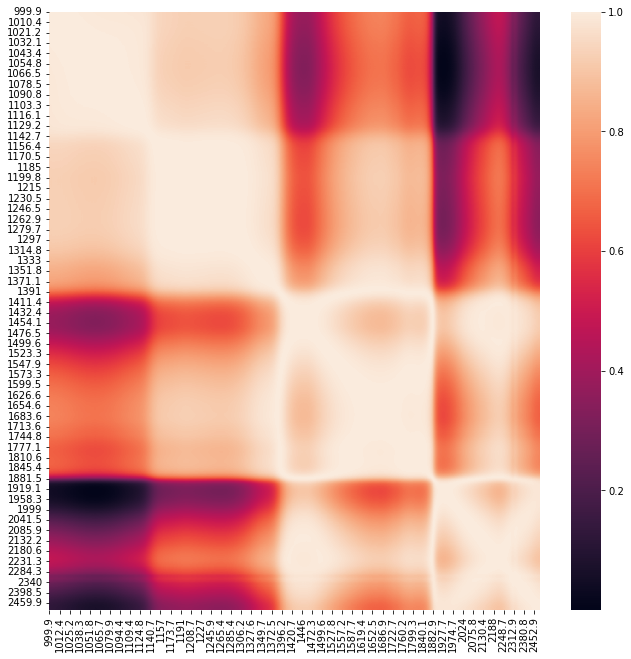

In [10]:
%%time
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [22]:
%%time
#Create x train for input and ouput data (for the pearson correlation selection feature)
x_train_plus_output = x_train
x_train_plus_output['Vit C (mg/100g)'] = df[['Vit C (mg/100g)']]

#Calculate correlation
cor = x_train_plus_output.corr()

#Correlation with output variable
cor_target = abs(cor["Vit C (mg/100g)"])
cor_target = cor_target.drop(labels=['Vit C (mg/100g)'])

# # Print features score
# print(df_cor_target.nlargest(100,columns="Korelasi"))

CPU times: user 670 ms, sys: 138 µs, total: 670 ms
Wall time: 668 ms


In [5]:
cor_target

999.9     0.125421
1000.3    0.126836
1000.7    0.127714
1001.1    0.127353
1001.4    0.128230
            ...   
2490.6    0.088900
2493      0.088477
2495.4    0.087901
2497.8    0.087662
2500.2    0.087347
Name: Vit C (mg/100g), Length: 1557, dtype: float64

In [25]:
# Create Pearson Correlation and features name
features_corr = pd.DataFrame(cor_target)
features = pd.DataFrame(x_train.columns)

#reset index, supaya tidak ada nilai nan di dataframe yg dibikin
features_corr.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)

#gabungin dataframe-nya
features_corr = pd.concat([features, features_corr],axis=1)

# Assign the column name
features_corr.columns = ["Features", "Pearson_Correlation"]

# Print features score
print(features_corr.nlargest(100,columns="Pearson_Correlation"))

    Features  Pearson_Correlation
117   1047.1             0.137123
116   1046.7             0.136406
815   1458.2             0.136308
819   1461.5             0.136306
806   1450.9             0.136270
..       ...                  ...
148   1060.4             0.134663
110   1044.2             0.134621
119     1048             0.134606
837   1476.5             0.134605
102   1040.8             0.134571

[100 rows x 2 columns]


In [7]:
# Fitur yang diseleksi
print(features_corr.nlargest(100,columns="Pearson_Correlation").iloc[:,0].values.flatten().tolist())

['1047.1', '1046.7', '1458.2', '1461.5', '1450.9', '1451.7', '1459.1', '1452.5', '1446.8', '1446', '1045', '1453.3', '1459.9', '1460.7', '1454.1', '1051.8', '1462.3', '1450.1', '1457.4', '1445.2', '1051', '1037.9', '1447.6', '1455', '1456.6', '1455.8', '1442.8', '1463.2', '1449.3', '1036.7', '1448.5', '1441.2', '1442', '1443.6', '1444.4', '1464', '1050.5', '1047.6', '1060', '1464.8', '1052.2', '1048.8', '1470.6', '1054.4', '1049.3', '1038.3', '1466.5', '1469', '1440.4', '1465.6', '1471.5', '1045.5', '1468.1', '1469.8', '1467.3', '1437.2', '1040.4', '1042.5', '1439.6', '1438', '1059.6', '1050.1', '1033.8', '1051.4', '1046.3', '1057.8', '1032.6', '1438.8', '1472.3', '1049.7', '1054', '1033.4', '1473.1', '1058.3', '1436.4', '1056.1', '1056.5', '1038.8', '1040', '1474', '1034.6', '1036.3', '1031.7', '1039.6', '1042.9', '1048.4', '1433.2', '1434', '1435.6', '1037.5', '1434.8', '1043.8', '1474.8', '1044.6', '1037.1', '1060.4', '1044.2', '1048', '1476.5', '1040.8']


# Linear Regression

In [8]:
#buat n-fold cv
#cross validation 10-fold
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [9]:
%%time

#tentukan metode scoring yang digunakan
metrics = {'rmse': 'neg_root_mean_squared_error',
               'mse': 'neg_mean_squared_error',
               'mae': 'neg_mean_absolute_error',
               'r2': 'r2'} 

n_feat = range(1, 101)
min_mse = 1000
min_rmse = 1000
min_mae = 1000

for nfeat in n_feat:
    print("==================================================")
    start_time = time.time()

    #ambil n fitur input hasil seleksi fitur Pearson Correlation
    x_train_selected = x_train[features_corr.nlargest(100,columns="Pearson_Correlation").iloc[0:nfeat, 0]]
    x_test_selected = x_test[features_corr.nlargest(100,columns="Pearson_Correlation").iloc[0:nfeat, 0]]

    #Create a Linear Regression
    lr_model = LinearRegression()

    #Train the model using the training sets
    lr_model.fit(x_train_selected, y_train)
    y_pred_lr = lr_model.predict(x_test_selected)

    #hitung score model dari data train
    scores = cross_validate(lr_model, x_train_selected, y_train, scoring=metrics, cv=cv, return_train_score=True)

    print("MSE model Linear Regression data Train dengan " + str(nfeat) + " fitur: " 
          + str(abs(round(scores['train_mse'].mean(), 2))))
    print("RMSE model Linear Regression data Train dengan " + str(nfeat) + " fitur:"
          + str(abs(round(scores['train_rmse'].mean(), 2))))
    print("MAE model Linear Regression data Train dengan " + str(nfeat) + " fitur:"
          + str(abs(round(scores['train_mae'].mean(), 2))))
    print("R2 model Linear Regression data Train dengan " + str(nfeat) + " fitur:"
          + str(abs(round(scores['train_r2'].mean(), 2))))
    print("-------------------------")
    print("MSE model Linear Regression data Test dengan " + str(nfeat) + " fitur:" 
          + str(abs(round(mean_squared_error(y_test, y_pred_lr), 2))))
    print("RMSE model Linear Regression data Test dengan " + str(nfeat) + " fitur:" 
          + str(abs(round(mean_squared_error(y_test, y_pred_lr, squared = False), 2))))
    print("MAE model Linear Regression data Test dengan " + str(nfeat) + " fitur:" 
          + str(abs(round(mean_absolute_error(y_test, y_pred_lr), 2))))
    print("R2 model Linear Regression data Test dengan " + str(nfeat) + " fitur:" 
          + str(abs(round(r2_score(y_test, y_pred_lr), 2))))
    print(" ")
    
    if(abs(round(mean_squared_error(y_test, y_pred_lr), 2) < min_mse)):
        min_mse = abs(round(mean_squared_error(y_test, y_pred_lr), 2))

    if(abs(round(mean_squared_error(y_test, y_pred_lr, squared = False), 2) < min_rmse)):
        min_rmse = abs(round(mean_squared_error(y_test, y_pred_lr, squared = False), 2))

    if(abs(round(mean_absolute_error(y_test, y_pred_lr), 2) < min_mae)):
        min_mae = abs(round(mean_absolute_error(y_test, y_pred_lr), 2))

    end_time = time.time()
    print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai MSE model terendah: " + str(min_mse))
print("Nilai RMSE model terendah: " + str(min_rmse))
print("Nilai MAE model terendah: " + str(min_mae))
print("Nilai R2 model tertinggi: " + str(max_r2))

MSE model Linear Regression data Train dengan 1 fitur: 188.01
RMSE model Linear Regression data Train dengan 1 fitur:13.71
MAE model Linear Regression data Train dengan 1 fitur:11.06
R2 model Linear Regression data Train dengan 1 fitur:0.02
-------------------------
MSE model Linear Regression data Test dengan 1 fitur:184.09
RMSE model Linear Regression data Test dengan 1 fitur:13.57
MAE model Linear Regression data Test dengan 1 fitur:10.44
R2 model Linear Regression data Test dengan 1 fitur:0.07
 
Total waktu:  0.16167974472045898
MSE model Linear Regression data Train dengan 2 fitur: 174.55
RMSE model Linear Regression data Train dengan 2 fitur:13.21
MAE model Linear Regression data Train dengan 2 fitur:10.64
R2 model Linear Regression data Train dengan 2 fitur:0.09
-------------------------
MSE model Linear Regression data Test dengan 2 fitur:197.18
RMSE model Linear Regression data Test dengan 2 fitur:14.04
MAE model Linear Regression data Test dengan 2 fitur:10.86
R2 model Linear

# Random Forest Regression (n = 100)

In [10]:
%%time

#tentukan metode scoring yang digunakan
metrics = {'rmse': 'neg_root_mean_squared_error',
               'mse': 'neg_mean_squared_error',
               'mae': 'neg_mean_absolute_error',
               'r2': 'r2'} 

n_feat = range(1, 101)
n_trees = [100]
min_mse = 1000
min_rmse = 1000
min_mae = 1000

for nfeat in n_feat:
    for ntrees in n_trees:
        print("==================================================")
        start_time = time.time()

        #ambil n fitur input hasil seleksi fitur Pearson Correlation
        x_train_selected = x_train[features_corr.nlargest(100,columns="Pearson_Correlation").iloc[0:nfeat, 0]]
        x_test_selected = x_test[features_corr.nlargest(100,columns="Pearson_Correlation").iloc[0:nfeat, 0]]

        #Create a Random Forest Regression
        rfg_model = RandomForestRegressor(n_estimators=ntrees)
        
        #Train the model using the training sets
        rfg_model.fit(x_train_selected, y_train)
        y_pred_rfg=rfg_model.predict(x_test_selected)

        #hitung score model dari data train
        scores = cross_validate(rfg_model, x_train_selected, y_train, scoring=metrics, cv=cv, return_train_score=True)

        print("MSE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_mse'].mean(), 2))))
        print("RMSE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_rmse'].mean(), 2))))
        print("MAE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_mae'].mean(), 2))))
        print("R2 model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_r2'].mean(), 2))))
        print("-------------------------")
        print("MSE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_squared_error(y_test, y_pred_rfg), 2))))
        print("RMSE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2))))
        print("MAE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_absolute_error(y_test, y_pred_rfg), 2))))
        print("R2 model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(r2_score(y_test, y_pred_rfg), 2))))
        print(" ")

        if(abs(round(mean_squared_error(y_test, y_pred_rfg), 2) < min_mse)):
            min_mse = abs(round(mean_squared_error(y_test, y_pred_rfg), 2))

        if(abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2) < min_rmse)):
            min_rmse = abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2))

        if(abs(round(mean_absolute_error(y_test, y_pred_rfg), 2) < min_mae)):
            min_mae = abs(round(mean_absolute_error(y_test, y_pred_rfg), 2))
            
        end_time = time.time()
        print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai MSE model terendah: " + str(min_mse))
print("Nilai RMSE model terendah: " + str(min_rmse))
print("Nilai MAE model terendah: " + str(min_mae))
print("Nilai R2 model tertinggi: " + str(max_r2))

MSE model Random Forest Regression data Train dengan 1 fitur dan 100 trees:50.24
RMSE model Random Forest Regression data Train dengan 1 fitur dan 100 trees:7.08
MAE model Random Forest Regression data Train dengan 1 fitur dan 100 trees:5.52
R2 model Random Forest Regression data Train dengan 1 fitur dan 100 trees:0.74
-------------------------
MSE model Random Forest Regression data Test dengan 1 fitur dan 100 trees:245.3
RMSE model Random Forest Regression data Test dengan 1 fitur dan 100 trees:15.66
MAE model Random Forest Regression data Test dengan 1 fitur dan 100 trees:12.69
R2 model Random Forest Regression data Test dengan 1 fitur dan 100 trees:0.42
 
Total waktu:  1.2362480163574219
MSE model Random Forest Regression data Train dengan 2 fitur dan 100 trees:48.7
RMSE model Random Forest Regression data Train dengan 2 fitur dan 100 trees:6.97
MAE model Random Forest Regression data Train dengan 2 fitur dan 100 trees:5.46
R2 model Random Forest Regression data Train dengan 2 fitu

# Random Forest Regression (n = 150)

In [11]:
%%time

#tentukan metode scoring yang digunakan
metrics = {'rmse': 'neg_root_mean_squared_error',
               'mse': 'neg_mean_squared_error',
               'mae': 'neg_mean_absolute_error',
               'r2': 'r2'} 

n_feat = range(1, 101)
n_trees = [150]
min_mse = 1000
min_rmse = 1000
min_mae = 1000

for nfeat in n_feat:
    for ntrees in n_trees:
        print("==================================================")
        start_time = time.time()

        #ambil n fitur input hasil seleksi fitur Pearson Correlation
        x_train_selected = x_train[features_corr.nlargest(100,columns="Pearson_Correlation").iloc[0:nfeat, 0]]
        x_test_selected = x_test[features_corr.nlargest(100,columns="Pearson_Correlation").iloc[0:nfeat, 0]]

        #Create a Random Forest Regression
        rfg_model = RandomForestRegressor(n_estimators=ntrees)
        
        #Train the model using the training sets
        rfg_model.fit(x_train_selected, y_train)
        y_pred_rfg=rfg_model.predict(x_test_selected)

        #hitung score model dari data train
        scores = cross_validate(rfg_model, x_train_selected, y_train, scoring=metrics, cv=cv, return_train_score=True)

        print("MSE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_mse'].mean(), 2))))
        print("RMSE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_rmse'].mean(), 2))))
        print("MAE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_mae'].mean(), 2))))
        print("R2 model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_r2'].mean(), 2))))
        print("-------------------------")
        print("MSE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_squared_error(y_test, y_pred_rfg), 2))))
        print("RMSE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2))))
        print("MAE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_absolute_error(y_test, y_pred_rfg), 2))))
        print("R2 model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(r2_score(y_test, y_pred_rfg), 2))))
        print(" ")

        if(abs(round(mean_squared_error(y_test, y_pred_rfg), 2) < min_mse)):
            min_mse = abs(round(mean_squared_error(y_test, y_pred_rfg), 2))

        if(abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2) < min_rmse)):
            min_rmse = abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2))

        if(abs(round(mean_absolute_error(y_test, y_pred_rfg), 2) < min_mae)):
            min_mae = abs(round(mean_absolute_error(y_test, y_pred_rfg), 2))

        end_time = time.time()
        print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai MSE model terendah: " + str(min_mse))
print("Nilai RMSE model terendah: " + str(min_rmse))
print("Nilai MAE model terendah: " + str(min_mae))
print("Nilai R2 model tertinggi: " + str(max_r2))

MSE model Random Forest Regression data Train dengan 1 fitur dan 150 trees:49.39
RMSE model Random Forest Regression data Train dengan 1 fitur dan 150 trees:7.02
MAE model Random Forest Regression data Train dengan 1 fitur dan 150 trees:5.51
R2 model Random Forest Regression data Train dengan 1 fitur dan 150 trees:0.74
-------------------------
MSE model Random Forest Regression data Test dengan 1 fitur dan 150 trees:248.21
RMSE model Random Forest Regression data Test dengan 1 fitur dan 150 trees:15.75
MAE model Random Forest Regression data Test dengan 1 fitur dan 150 trees:12.73
R2 model Random Forest Regression data Test dengan 1 fitur dan 150 trees:0.44
 
Total waktu:  1.4841291904449463
MSE model Random Forest Regression data Train dengan 2 fitur dan 150 trees:48.9
RMSE model Random Forest Regression data Train dengan 2 fitur dan 150 trees:6.99
MAE model Random Forest Regression data Train dengan 2 fitur dan 150 trees:5.48
R2 model Random Forest Regression data Train dengan 2 fit

# Random Forest Regression n = 200

In [12]:
%%time

#tentukan metode scoring yang digunakan
metrics = {'rmse': 'neg_root_mean_squared_error',
               'mse': 'neg_mean_squared_error',
               'mae': 'neg_mean_absolute_error',
               'r2': 'r2'} 

n_feat = range(1, 101)
n_trees = [200]
min_mse = 1000
min_rmse = 1000
min_mae = 1000

for nfeat in n_feat:
    for ntrees in n_trees:
        print("==================================================")
        start_time = time.time()

        #ambil n fitur input hasil seleksi fitur MI
        x_train_selected = x_train[features_corr.nlargest(100,columns="Pearson_Correlation").iloc[0:nfeat, 0]]
        x_test_selected = x_test[features_corr.nlargest(100,columns="Pearson_Correlation").iloc[0:nfeat, 0]]
        
        #Create a Gaussian Classifier
        rfg_model = RandomForestRegressor(n_estimators=ntrees)
        
        #Train the model using the training sets
        rfg_model.fit(x_train_selected, y_train)
        y_pred_rfg=rfg_model.predict(x_test_selected)

        #hitung score model dari data train
        scores = cross_validate(rfg_model, x_train_selected, y_train, scoring=metrics, cv=cv, return_train_score=True)

        print("MSE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_mse'].mean(), 2))))
        print("RMSE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_rmse'].mean(), 2))))
        print("MAE model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_mae'].mean(), 2))))
        print("R2 model Random Forest Regression data Train dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:"
              + str(abs(round(scores['train_r2'].mean(), 2))))
        print("-------------------------")
        print("MSE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_squared_error(y_test, y_pred_rfg), 2))))
        print("RMSE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2))))
        print("MAE model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(mean_absolute_error(y_test, y_pred_rfg), 2))))
        print("R2 model Random Forest Regression data Test dengan " + str(nfeat) + " fitur dan " + str(ntrees) + " trees:" 
              + str(abs(round(r2_score(y_test, y_pred_rfg), 2))))
        print(" ")

        if(abs(round(mean_squared_error(y_test, y_pred_rfg), 2) < min_mse)):
            min_mse = abs(round(mean_squared_error(y_test, y_pred_rfg), 2))

        if(abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2) < min_rmse)):
            min_rmse = abs(round(mean_squared_error(y_test, y_pred_rfg, squared = False), 2))

        if(abs(round(mean_absolute_error(y_test, y_pred_rfg), 2) < min_mae)):
            min_mae = abs(round(mean_absolute_error(y_test, y_pred_rfg), 2))

        if(abs(round(r2_score(y_test, y_pred_rfg), 2) < max_r2)):
            max_r2 = abs(round(r2_score(y_test, y_pred_rfg), 2))

        end_time = time.time()
        print("Total waktu: ", end_time - start_time)

print("====Nilai Performa Tertinggi====")
print("Nilai MSE model terendah: " + str(min_mse))
print("Nilai RMSE model terendah: " + str(min_rmse))
print("Nilai MAE model terendah: " + str(min_mae))
print("Nilai R2 model tertinggi: " + str(max_r2))

MSE model Random Forest Regression data Train dengan 1 fitur dan 200 trees:50.16
RMSE model Random Forest Regression data Train dengan 1 fitur dan 200 trees:7.08
MAE model Random Forest Regression data Train dengan 1 fitur dan 200 trees:5.55
R2 model Random Forest Regression data Train dengan 1 fitur dan 200 trees:0.74
-------------------------
MSE model Random Forest Regression data Test dengan 1 fitur dan 200 trees:246.4
RMSE model Random Forest Regression data Test dengan 1 fitur dan 200 trees:15.7
MAE model Random Forest Regression data Test dengan 1 fitur dan 200 trees:12.67
R2 model Random Forest Regression data Test dengan 1 fitur dan 200 trees:0.43
 
Total waktu:  2.0080907344818115
MSE model Random Forest Regression data Train dengan 2 fitur dan 200 trees:48.8
RMSE model Random Forest Regression data Train dengan 2 fitur dan 200 trees:6.98
MAE model Random Forest Regression data Train dengan 2 fitur dan 200 trees:5.49
R2 model Random Forest Regression data Train dengan 2 fitur